In [2]:
import os
import cv2 
import itertools
import numpy as np 
import pandas as pd 

test_dir = "C:\\Users\\Srinivas\\OneDrive\\Documents\\Alzheimer_s Dataset\\test"
train_dir = r"C:\Users\Srinivas\OneDrive\Documents\Alzheimer_s Dataset\train"

data = []


In [3]:
for dirtrain in os.listdir(train_dir): 
    print(dirtrain)
    for tr in os.listdir(os.path.join(train_dir, dirtrain)):  # Use os.path.join to construct the full path
        img = cv2.imread(os.path.join(train_dir, dirtrain, tr))  # Use os.path.join to construct the full image path
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        
        data.append([img, dirtrain])   

MildDemented
ModerateDemented
NonDemented
VeryMildDemented


In [4]:
for dirtest in os.listdir(test_dir):    
    print(dirtest)
    for ts in os.listdir(os.path.join(test_dir, dirtest)):  # Use os.path.join to construct the full path
        img = cv2.imread(os.path.join(test_dir, dirtest, ts))  # Use os.path.join to construct the full image path
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        
        data.append([img, dirtest])

MildDemented
ModerateDemented
NonDemented
VeryMildDemented


In [5]:
import random
random.seed(20)

In [6]:
random.shuffle(data)


In [7]:
x, y = [], []
for e in data:
    x.append(e[0])
    y.append(e[1])

In [8]:
from sklearn.preprocessing import OneHotEncoder

x = np.array(x)
y = np.array(y)
y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore').fit(y)
print(enc.categories_)
y = enc.transform(y).toarray()
print(f'Data   :   {str(x.shape)}')
print(f'Labels :   {str(y.shape)}')

[array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')]
Data   :   (3959, 32, 32, 1)
Labels :   (3959, 4)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)


In [10]:
import tensorflow as tf

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.config.list_physical_devices('GPU'))

[]


In [12]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (4, 4), padding='same', activation=tf.nn.relu, 
    input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)), Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),

    tf.keras.layers.Conv2D(128, (2,2), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),

    tf.keras.layers.Conv2D(256, (2,2), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),
                    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0

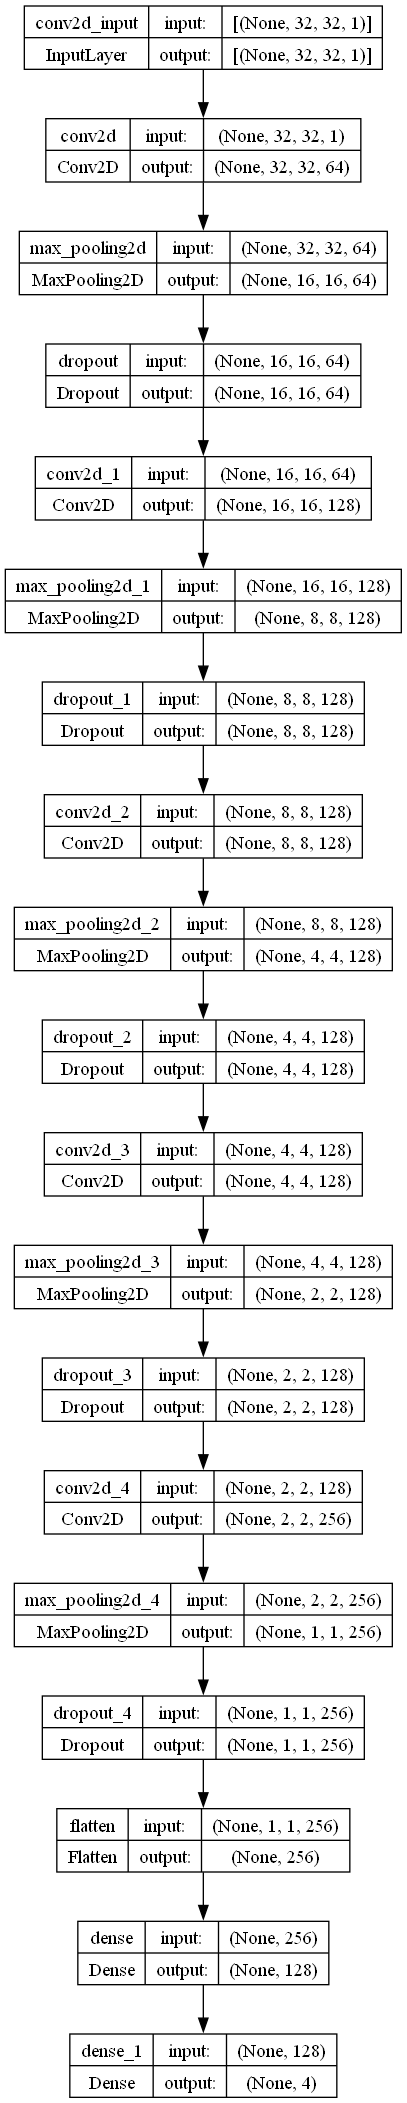

In [14]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [15]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64,verbose=1,shuffle=True)


Epoch 1/200


40/40 [==============================] - 5s 82ms/step - loss: 2.9997 - accuracy: 0.6084 - val_loss: 1.0303 - val_accuracy: 0.6703
Epoch 2/200
40/40 [==============================] - 3s 72ms/step - loss: 0.9181 - accuracy: 0.6719 - val_loss: 0.9240 - val_accuracy: 0.6703
Epoch 3/200
40/40 [==============================] - 3s 78ms/step - loss: 0.8676 - accuracy: 0.6719 - val_loss: 0.8025 - val_accuracy: 0.6703
Epoch 4/200
40/40 [==============================] - 3s 82ms/step - loss: 0.8051 - accuracy: 0.6715 - val_loss: 0.7746 - val_accuracy: 0.6703
Epoch 5/200
40/40 [==============================] - 3s 82ms/step - loss: 0.7990 - accuracy: 0.6715 - val_loss: 0.9200 - val_accuracy: 0.6703
Epoch 6/200
40/40 [==============================] - 3s 75ms/step - loss: 0.7932 - accuracy: 0.6700 - val_loss: 0.7507 - val_accuracy: 0.6767
Epoch 7/200
40/40 [==============================] - 3s 82ms/step - loss: 0.7680 - accuracy: 0.6723 - val_loss: 0.8518 - val_accuracy: 0.6719
Epo

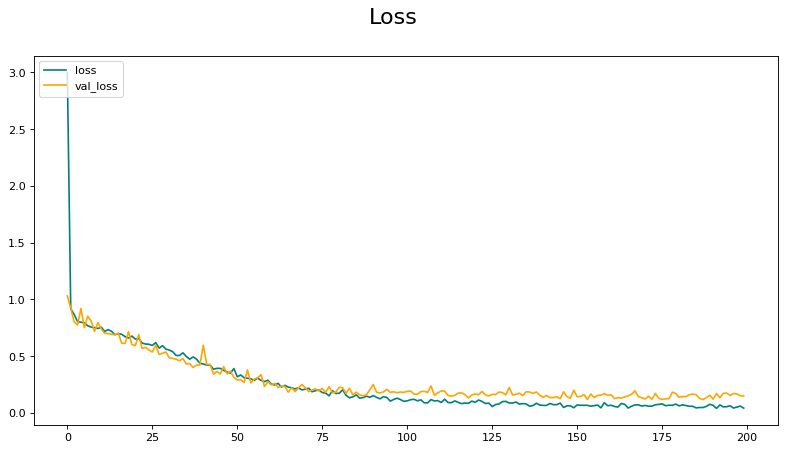

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

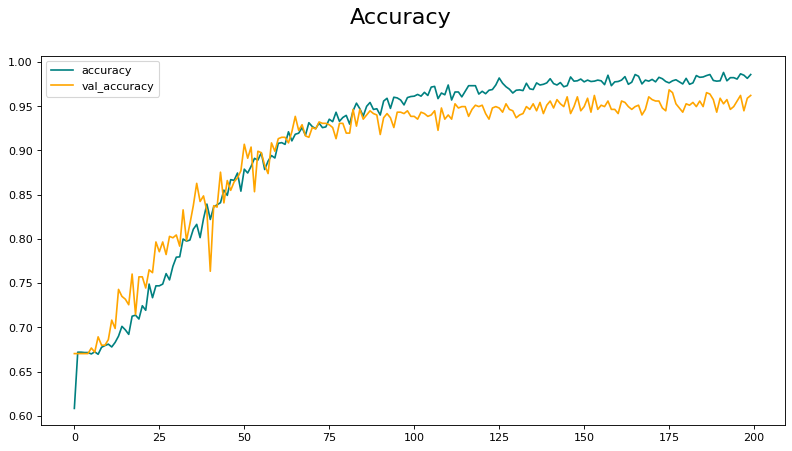

In [17]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [18]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)
y_pred = model.predict(x_test).argmax(axis=1)
print(f'Test Loss     : {loss_and_metrics[0]}')
print(f'Test Accuracy : {loss_and_metrics[1]}')
print(y_test.shape, y_pred.shape)

25/25 - 0s - loss: 0.1945 - accuracy: 0.9545 - 397ms/epoch - 16ms/step
25/25 [==============================] - 1s 13ms/step
Test Loss     : 0.19452720880508423
Test Accuracy : 0.9545454382896423
(792, 4) (792,)


In [19]:
from sklearn import metrics

df = pd.DataFrame(
  data = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred),
  columns = ['0', '1', '2', '3'],
  index = ['0', '1', '2', '3']
)
df

,0,1,2,3
0,67,0,5,7
1,0,12,0,0
2,3,0,533,3
3,3,0,15,144


<AxesSubplot:>

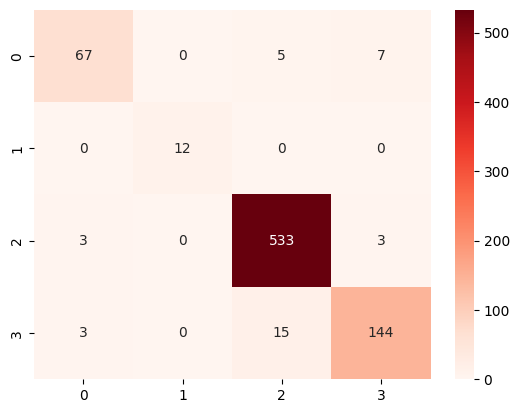

In [20]:
import seaborn as sns

sns.heatmap(df, cmap="Reds", annot=True, fmt='.0f')

In [21]:
model.save('model.keras')

In [22]:
model.save('model.h5')

c:\Users\Srinivas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
